In [62]:
from gql import gql,Client
from gql.transport.requests import RequestsHTTPTransport
#this is the final file

In [63]:
sample_transport=RequestsHTTPTransport(
    url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
    verify=True,
    retries=5,
)
client = Client(
transport = sample_transport
)


In [64]:
liquidity = []
volumecheck = []
transactions = []
ids = []
count = 11276855


In [65]:
while count > 11250000:
    query = gql('''
    query {
    uniswapFactory(id:"0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f",block: {number: '''+str(count)+'''}){
    id
    totalLiquidityUSD
    totalVolumeUSD
    totalLiquidityETH
    txCount
    
    }
    }''')
    data = client.execute(query)
    print(data)
    print('hello')
    val_1 = data['uniswapFactory']['totalLiquidityUSD']
    val_2 = data['uniswapFactory']['totalVolumeUSD']
    val_3 = data['uniswapFactory']['txCount']
    val_4 = data['uniswapFactory']['id']
    ids.append(val_4)
    liquidity.insert(0, float(val_1))
    volumecheck.append(float(val_2))
    transactions.append(float(val_3))
    count=count-1000
#Uniswap V2 contract = 0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f

{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '3775354.007258222495612702909830977', 'totalLiquidityUSD': '1811649153.462412111578968988717799', 'totalVolumeUSD': '35049599668.73876561807658387583774', 'txCount': '17598124'}}
hello
{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '3716419.644552012164888287068359298', 'totalLiquidityUSD': '1737788021.472165726897644996532261', 'totalVolumeUSD': '34974884910.30537389104559487914776', 'txCount': '17573468'}}
hello
{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '3934901.983549146309251887241568918', 'totalLiquidityUSD': '1818425905.091215582617297956159227', 'totalVolumeUSD': '34935026310.94969831351041433894119', 'txCount': '17551293'}}
hello
{'uniswapFactory': {'id': '0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f', 'totalLiquidityETH': '4199354.358197023840480766052813417', 'totalLiquidityUSD': '194631596

In [66]:
#data = client.execute(query)
print(liquidity)
print(volumecheck)
print(transactions)
print(ids)
print(len(liquidity))
print(len(volumecheck))
print(len(transactions))

[3328232968.707096, 3340317189.7901344, 3343311115.7662024, 3322654891.001432, 3287652062.667633, 3266161285.3733935, 3286684309.522151, 3292707859.65119, 3310371966.5423737, 3296575637.752872, 3289315582.951318, 3273556685.2204566, 3229721389.37854, 3194248968.7229958, 3165732164.9481854, 3195533754.87635, 3184057537.622968, 3199541216.880352, 3187696482.1860557, 3099623851.698782, 3098644343.3771596, 3049108617.7176027, 2067006841.4017155, 1946315966.6118042, 1818425905.0912156, 1737788021.4721658, 1811649153.462412]
[35049599668.73876, 34974884910.305374, 34935026310.9497, 34898186686.03001, 34860103490.64489, 34735400449.66558, 34691965406.807, 34623574786.188736, 34576162627.54394, 34548235524.611496, 34509543684.42521, 34476007036.39205, 34433658518.58281, 34394289920.97226, 34342551787.167274, 34314000675.462303, 34286867957.31365, 34263534592.01088, 34239699692.49186, 34217737899.599747, 34174845172.91054, 33952974779.811222, 33916619036.34685, 33883515781.18442, 33859667859.16

In [67]:
import numpy as np
import pandas as pd

In [68]:
import matplotlib.pyplot as plt

In [69]:
df = pd.DataFrame(data)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, id to txCount
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   uniswapFactory  5 non-null      object
dtypes: object(1)
memory usage: 80.0+ bytes
None
                                               uniswapFactory
id                 0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f
totalLiquidityETH         7098175.127982260102346545541858265
totalLiquidityUSD         3328232968.707095905815088957839271
totalVolumeUSD            33778693576.40070351318113153093614
txCount                                              17039084


In [70]:
df.uniswapFactory = df.uniswapFactory.fillna({i: {} for i in df.index})
#df.uniswapFactory = df.uniswapFactory.apply(literal_eval)

In [71]:
print(df)

                                               uniswapFactory
id                 0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f
totalLiquidityETH         7098175.127982260102346545541858265
totalLiquidityUSD         3328232968.707095905815088957839271
totalVolumeUSD            33778693576.40070351318113153093614
txCount                                              17039084


In [72]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib as plt
import matplotlib.pyplot as plt

In [73]:
cummulative_list = pd.DataFrame({'ID':ids,'Liquidity':liquidity,'Volume':volumecheck,'Transactions':transactions})
print(cummulative_list)

                                            ID     Liquidity        Volume  \
0   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.328233e+09  3.504960e+10   
1   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.340317e+09  3.497488e+10   
2   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.343311e+09  3.493503e+10   
3   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.322655e+09  3.489819e+10   
4   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.287652e+09  3.486010e+10   
5   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.266161e+09  3.473540e+10   
6   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.286684e+09  3.469197e+10   
7   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.292708e+09  3.462357e+10   
8   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.310372e+09  3.457616e+10   
9   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.296576e+09  3.454824e+10   
10  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.289316e+09  3.450954e+10   
11  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.273557e+09  3.

In [74]:
cummulative_list['cum_sum'] = cummulative_list['Liquidity'].cumsum()
cummulative_list['check'] = range(1,len(cummulative_list['Liquidity'])+1)
cummulative_list['Liquidity'] = pd.to_numeric(cummulative_list['Liquidity'])
cummulative_list['Moving Average'] = cummulative_list['cum_sum'] / cummulative_list['check']
cummulative_list['Rolling Mean'] = cummulative_list['Liquidity'].rolling(window = 3).mean()
print(cummulative_list)
#the difference in the moving averga and the rolling mean comes into play because for rolling mean we consider a window of 3
#wheras for moving average no such window is seen

                                            ID     Liquidity        Volume  \
0   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.328233e+09  3.504960e+10   
1   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.340317e+09  3.497488e+10   
2   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.343311e+09  3.493503e+10   
3   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.322655e+09  3.489819e+10   
4   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.287652e+09  3.486010e+10   
5   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.266161e+09  3.473540e+10   
6   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.286684e+09  3.469197e+10   
7   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.292708e+09  3.462357e+10   
8   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.310372e+09  3.457616e+10   
9   0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.296576e+09  3.454824e+10   
10  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.289316e+09  3.450954e+10   
11  0x5C69bEe701ef814a2B6a3EDD4B1652CB9cc5aA6f  3.273557e+09  3.

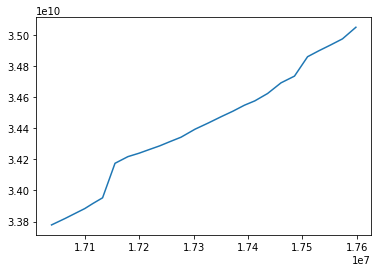

In [75]:
#plt.plot(cummulative_list['Liquidity'],cummulative_list['Rolling Mean'])
#plt.plot(cummulative_list['Rolling Mean'],cummulative_list['Moving Average'])
plt.plot(cummulative_list['Transactions'],cummulative_list['Volume'])
#the relation between the transactions and the liquidity for the uniswap-v2 pool

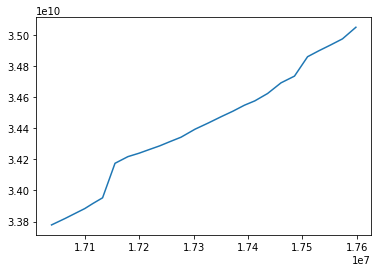

In [76]:
plt.plot(cummulative_list['Transactions'],cummulative_list['Volume'])
